In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dataset_name = 'juvenile'
config_file = '../dataset_configs/juvenile_dataset.json'
# dataset_name = 'juvenile_dfovf'
# dataset_name = 'juvenile_noise_std0p2'
# dataset_name = 'juvenile_noise_std0p5'
# config_file = f'../../{dataset_name}_dataset/notebooks/{dataset_name}_dataset.json'

dataset_name = 'adult'
config_file = '../dataset_configs/adult_dataset.json'

from analysis_config import (juvenile_window_name_to_frames, juvenile_distance_window_name_to_sample_size, juvenile_distance_window_name_to_seed,
                            adult_window_name_to_frames, adult_distance_window_name_to_sample_size, adult_distance_window_name_to_seed)
if dataset_name.startswith('juvenile'):
    # window_name = 'time_window_3s'
    # window_name = 'time_window_5s'
    window_name = 'time_window_7s'
    frame_window = juvenile_window_name_to_frames[window_name]
    do_reorder_cs = True
    odor_orders = ['cs_plus', 'cs_minus', 'aa3', 'TDCA', 'TCA', 'GCA']
    vsnames = ['aa_vs_aa', 'aa_vs_ba', 'ba_vs_ba']

    sample_size = juvenile_distance_window_name_to_sample_size[window_name]
    seed = juvenile_distance_window_name_to_seed[window_name]

    mahal_ylim_boxplot = (0, 935.6151218959913)
    mahal_cbar_interval = 200

    center_euclidean_ylim = (0, 16.221725749658447)
    center_euclidean_cbar_interval = 2.0

    if dataset_name == 'juvenile_dfovf':
        center_euclidean_ylim = None
        center_euclidean_cbar_interval = None

    if window_name == 'time_window_7s':
        mahal_cbar_interval = 100
        mahal_ylim_boxplot = (0, 350)

    if dataset_name is not 'juvenile':
        mahal_cbar_interval = None
        mahal_ylim_boxplot = None


elif dataset_name.startswith('adult'):
    window_name = 'time_window_3s'
    window_name = 'time_window_5s'
    window_name = 'time_window_7s'
    frame_window = adult_window_name_to_frames[window_name]
    do_reorder_cs = False
    odor_orders = None
    vsnames = ['learned_vs_learned', 'learned_vs_novel', 'novel_vs_novel']

    sample_size = adult_distance_window_name_to_sample_size[window_name]
    seed = adult_distance_window_name_to_seed[window_name]

    mahal_ylim_boxplot = (0, 518.2)
    mahal_cbar_interval = 100

    center_euclidean_ylim = (0, 5.6835741178251755)
    center_euclidean_cbar_interval = 1.0

else:
    raise ValueError(f'Unknown dataset_name: {dataset_name}')

window = frame_window
print(window_name, window)
window_tag = f'window_{window[0]}to{window[1]}'


import os
fig_dir = f'../figures/{dataset_name}/{window_name}'
os.makedirs(fig_dir, exist_ok=True)


time_window_7s [40, 93]


<>:39: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:39: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_1047256/2866018487.py:39: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if dataset_name is not 'juvenile':


In [23]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['ps.fonttype'] = 42
rcParams['ps.useafm'] = True
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [24]:
hue_color_adjusted = True
hue_colors = ['tab:blue', 'tab:orange']
import seaborn as sns
def _get_brighter_color(color: str):
    new_color = sns.set_hls_values(color, l=0.7)
    # convert to hex string
    color_string = f"#{''.join([f'{int(val*255):02x}' for val in new_color])}"
    return color_string


if hue_color_adjusted:
    hue_colors = [_get_brighter_color(color) for color in hue_colors]

print(hue_colors)

['#7cbce8', '#ffad65']


Plotting average trace...
Extracted_Data_mock1_Fish1 None
Computing distance matrices...
/tungstenfs/scratch/gfriedri/hubo/Dp_manifold/BNP_dataset/data/Claire/spike_prob/dorsal/per_odor_aligned/index_formatted_firing_rate/mahal_seed205_window40to93


Plotting per condition...
{'ncol': 2, 'row_height': 1.35, 'col_width': 1.35, 'title_fontsize': 7, 'colorbar_fontsize': 6, 'ylabel_fontsize': 7, 'ylabels': None, 'ylabel_colors': None, 'cmap': 'turbo', 'clim': None, 'color_norm': None, 'cbar_interval': 100}
clim: (9.545272487753877, 182.00410118342472)
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7
Plotting delta matrix...
clim: (-61.51214478524917, 61.51214478524917)
ylabel_ vfontsize: 7
Plotting vs statistics...


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(


Plotting per fish...


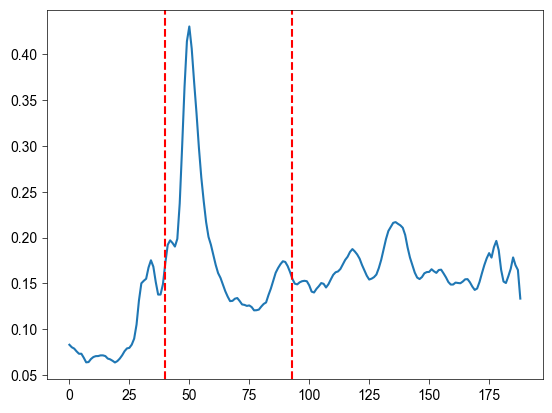

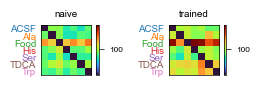

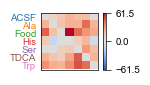

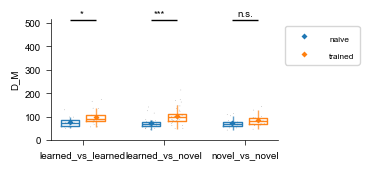

In [25]:
from catrace.run.run_distance import run_distance, RunDistanceParams, PlotDistanceParams, PlotPerCondMatParams, PlotMeanDeltaMatParams
from catrace.visualize import PlotBoxplotMultiOdorCondParams
# ylabels = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3']
# ylabel_colors = ['#d25dd2', '#766acb', '#428cba', '#da866b', '#daa36b', '#879a73']
ylabels = None
ylabel_colors = None
hue_color_adjusted = False
hue_colors = ['tab:blue', 'tab:orange']
strip_hue_colors = ['gray', 'gray']
mean_hue_colors = ['tab:blue', 'tab:orange']
import seaborn as sns
def _get_brighter_color(color: str, l=0.85):
    new_color = sns.set_hls_values(color, l=0.85)
    return new_color
if hue_color_adjusted:
    hue_colors = [_get_brighter_color(color) for color in hue_colors]
    strip_hue_colors = [_get_brighter_color(color) for color in strip_hue_colors]
    mean_hue_colors = [_get_brighter_color(color, l=0.6) for color in mean_hue_colors]


plot_params = PlotDistanceParams(
    per_cond = PlotPerCondMatParams(
        row_height=1.35,
        col_width=1.35,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = ylabel_colors,
        ylabels = ylabels,
        cbar_interval=mahal_cbar_interval),
    mean_delta = PlotMeanDeltaMatParams(
        figsize=(1.6, 1.6),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
        ylabels = ylabels,
        ylabel_colors = ylabel_colors
    ),
    vs_measure = PlotBoxplotMultiOdorCondParams(
        figsize=(3.8, 1.8),
        label_fontsize=7,
        show_ns=True,
        box_linewidth=1,
        strip_size=0.5,
        mean_marker_size=1,
        pvalue_marker_xoffset=0.05,
        ylim=mahal_ylim_boxplot,
        hue_colors=hue_colors,
        strip_hue_colors=strip_hue_colors,
        mean_hue_colors=mean_hue_colors,
    )
)
params = RunDistanceParams(
    config_file = config_file,
    assembly_name = '',
    time_window = window,
    sample_size = sample_size,
    metric = 'mahal',
    seed=seed,
    do_normalize_simdf = False,
    do_reorder_cs = do_reorder_cs,
    odor_orders = odor_orders,
    vsnames = vsnames,
    overwrite_computation = False,
    reg=1e-5,
    do_plot_per_fish = False,
    plot_params = plot_params,
    parallelism = 20,
    manifold_level='odor')

output_figs, test_results = run_distance(params)

In [26]:
from catrace.for_paper import save_figure_for_paper

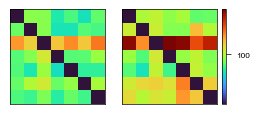

In [27]:
import copy
import os
import matplotlib


def adjust_fig_per_cond(output_figs):
    fig_per_cond_copy = output_figs['fig_per_cond']
    ax = fig_per_cond_copy.get_axes()
    # Remove title for ax[0] and ax[1]
    ax[0].set_title('')
    ax[1].set_title('')
    # Delete y ticks on the second axes
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    # Delete colorbar on the first axes
    fig = fig_per_cond_copy
    # Keep arg-phe
    fig.delaxes(fig.axes[2])
    if len(fig.axes) > 5:
        fig.delaxes(fig.axes[4])
        fig.delaxes(fig.axes[5])
        fig.delaxes(fig.axes[2])
        fig.delaxes(fig.axes[4])
        fig.delaxes(fig.axes[2])
    fig_per_cond_copy.tight_layout()
    return fig_per_cond_copy

fig_per_cond_copy = adjust_fig_per_cond(output_figs)
fig_subdir = os.path.join(fig_dir, params.metric)
os.makedirs(fig_subdir, exist_ok=True)
save_figure_for_paper(fig_per_cond_copy, f'{dataset_name}_{params.metric}_distance_per_cond_{window_tag}', fig_subdir, save_eps=True)
fig_per_cond_copy

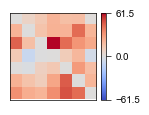

In [28]:
def adjust_fig_delta(output_figs):
    fig_delta_copy = output_figs['fig_delta']
    ax = fig_delta_copy.get_axes()
    ax[0].set_yticks([])
    fig_delta_copy.tight_layout()
    return fig_delta_copy

fig_delta_copy = adjust_fig_delta(output_figs)
save_figure_for_paper(fig_delta_copy, f'{dataset_name}_{params.metric}_mean_delta_{window_tag}', fig_subdir, save_eps=True)
fig_delta_copy

/tmp/ipykernel_1047256/304389908.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([xtick_mapping[xtick.get_text()] for xtick in xticklabels], fontsize=tick_fontsize)


ylim: (0.0, 518.2)


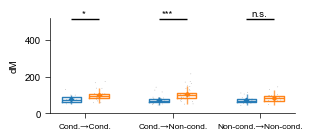

In [29]:
def adjust_fig_multi_vs(output_figs, figsize=(2.8, 1.5)):
    label_fontsize = 7
    tick_fontsize = 6
    fig = output_figs['fig_multi_vs']
    ax = fig.get_axes()[0]
    # Remove legend
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    # Rest figure size
    fig.set_size_inches(figsize[0], figsize[1])
    # Change ylabel
    ylabel = ax.get_ylabel()
    if ylabel == 'D_M':
        ax.set_ylabel('dM', fontsize=label_fontsize)
    elif ylabel == 'center D_E':
        ax.set_ylabel('dE', fontsize=label_fontsize)

    xticklabels = ax.get_xticklabels()

    xtick_mapping = None
    if ylabel == 'D_M':
        if dataset_name.startswith('juvenile'):
            xtick_mapping = {'aa_vs_aa': 'AA→AA', 'aa_vs_ba': 'AA→BA', 'ba_vs_ba': 'BA→BA', 'ba_vs_aa': 'BA→AA'}
        elif dataset_name.startswith('adult'):
            xtick_mapping = {'learned_vs_learned': 'Cond.→Cond.', 'learned_vs_novel': 'Cond.→Non-cond.',
                                'novel_vs_learned': 'Non-cond.→Cond.', 'novel_vs_novel': 'Non-cond.→Non-cond.'}
    elif ylabel == 'center D_E':
        if dataset_name.startswith('juvenile'):
            xtick_mapping = {'aa_vs_aa': 'AA↔AA', 'aa_vs_ba': 'AA↔BA', 'ba_vs_ba': 'BA↔BA', 'ba_vs_aa': 'BA↔AA'}
        elif dataset_name.startswith('adult'):
            xtick_mapping = {'learned_vs_learned': 'Cond.↔Cond.', 'learned_vs_novel': 'Cond.↔Non-cond.',
                                'novel_vs_learned': 'Non-cond.↔Cond.', 'novel_vs_novel': 'Non-cond.↔Non-cond.'}
    if xtick_mapping is not None:
        ax.set_xticklabels([xtick_mapping[xtick.get_text()] for xtick in xticklabels], fontsize=tick_fontsize)
    fig.tight_layout()

    # Get ylim
    ylim = ax.get_ylim()
    print(f'ylim: {ylim}')
    return fig


if dataset_name.startswith('juvenile'):
    figsize = (2.8, 1.5)
elif dataset_name.startswith('adult'):
    figsize = (3.3, 1.5)

fig = adjust_fig_multi_vs(output_figs, figsize=figsize)
fig_name = f'{dataset_name}_{params.metric}_multi_vs_{window_tag}'
if hue_color_adjusted:
    fig_name += '_adjusted_color'
save_figure_for_paper(fig, fig_name, fig_subdir)
fig


In [30]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
sentence = sentence.replace('aa_vs_aa', 'AvsA').replace('aa_vs_ba', 'AvsB').replace('ba_vs_aa', 'BvsA').replace('ba_vs_ba', 'BvsB')
print(sentence)
# Save sentence into a text file
from os.path import join as pjoin
with open(pjoin(fig_subdir, f'{dataset_name}_{params.metric}_multi_vs_{window_tag}.txt'), 'w') as f:
    f.write(sentence)

For learned_vs_learned, Comparing naive (mean = 77.58 ± 20.39, n = 16) vs trained (mean = 100.36 ± 33.53, n = 18): Mann–Whitney U test, U = 74.00, P = 0.016. For learned_vs_novel, Comparing naive (mean = 72.48 ± 21.74, n = 32) vs trained (mean = 104.21 ± 36.12, n = 36): Mann–Whitney U test, U = 209.00, P = 6.7 × 10^-6. For novel_vs_novel, Comparing naive (mean = 72.87 ± 20.87, n = 16) vs trained (mean = 85.18 ± 23.52, n = 18): Mann–Whitney U test, U = 92.00, P = 0.076.


Plotting average trace...
Extracted_Data_mock1_Fish1 None
Computing distance matrices...


Extracted_Data_mock6_FishXExtracted_Data_mock4_FishXExtracted_Data_mock5_FishXExtracted_Data_mock1_Fish1Extracted_Data_mockA10_FishYExtracted_Data_mock8_FishYExtracted_Data_mockA10_FishXExtracted_Data_mockA10_fishZExtracted_Data_Exp4_Fish3Extracted_Data_Exp6_Fish1Extracted_Data_Exp8_Fish1 Extracted_Data_Exp6_Fish4  Extracted_Data_Exp7_Fish3Extracted_Data_ExpA10_Setup2_Fish1    Extracted_Data_ExpA10_Setup3_Fish1 Extracted_Data_ExpA10_Setup2_Fish2None Extracted_Data_Exp8_Fish4    NoneNoneNone NoneNone 
  NoneNoneNoneNone

NoneNoneNoneNone

None
NoneNone










Extracted_Data_mock4_FishXExtracted_Data_mock1_Fish1Extracted_Data_mock5_FishXExtracted_Data_Exp7_Fish3 Extracted_Data_mock6_FishX Extracted_Data_Exp6_Fish1 Extracted_Data_mockA10_fishZExtracted_Data_mock8_FishYExtracted_Data_Exp8_Fish4Extracted_Data_mockA10_FishYExtracted_Data_mockA10_FishXExtracted_Data_Exp8_Fish1None Extracted_Data_ExpA10_Setup2_Fish1Extracted_Data_Exp6_Fish4None  Extracted_Data_Exp4_Fish3NoneExtracted_Data_E

/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(


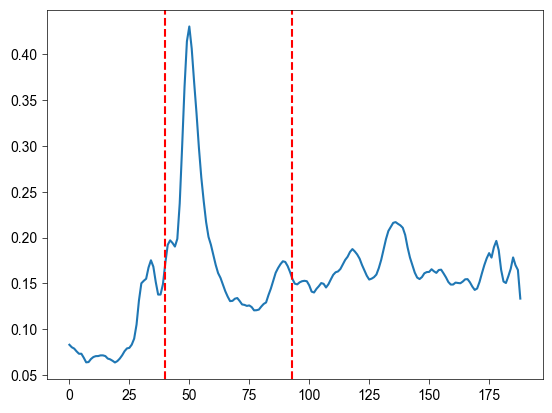

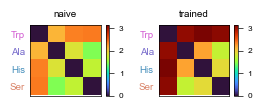

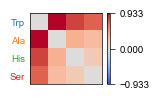

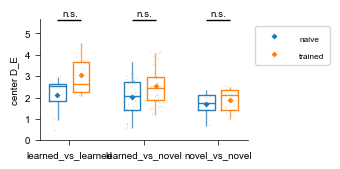

In [31]:
plot_params = PlotDistanceParams(
    per_cond = PlotPerCondMatParams(
        row_height=1.36,
        col_width=1.36,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = ['#d25dd2', '#766acb', '#428cba', '#da866b', '#daa36b', '#879a73'],
        cbar_interval= center_euclidean_cbar_interval   # 2.0
    ),
    mean_delta = PlotMeanDeltaMatParams(
        figsize=(1.7, 1.7),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
        ylabels = ylabels,
        ylabel_colors = ylabel_colors
    ),
    vs_measure = PlotBoxplotMultiOdorCondParams(
        figsize=(3.5, 1.8),
        label_fontsize=7,
        show_ns=True,
        box_linewidth=1,
        strip_size=0.5,
        mean_marker_size=1,
        pvalue_marker_xoffset=0.05,
        ylim=center_euclidean_ylim, #(0, 16.221725749658447),
        hue_colors=hue_colors,
        strip_hue_colors=strip_hue_colors,
        mean_hue_colors=mean_hue_colors,
    ))
params = RunDistanceParams(
    config_file = config_file,
    assembly_name = '',
    time_window = window,
    sample_size = sample_size,
    metric = 'center_euclidean',
    seed=seed,
    do_normalize_simdf = False,
    do_reorder_cs = do_reorder_cs,
    odor_orders = odor_orders,
    vsnames = vsnames,
    overwrite_computation = False,
    do_plot_per_fish = False,
    plot_params = plot_params,
    parallelism = 20,
    manifold_level='odor')

output_figs, test_results = run_distance(params)

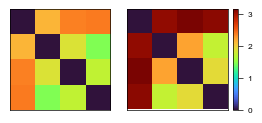

In [32]:
fig_subdir = os.path.join(fig_dir, params.metric)
os.makedirs(fig_subdir, exist_ok=True)

fig_per_cond_copy = adjust_fig_per_cond(output_figs)
save_figure_for_paper(fig_per_cond_copy, f'{dataset_name}_{params.metric}_distance_per_cond_{window_tag}', fig_subdir, save_eps=True)
fig_per_cond_copy


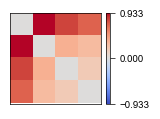

In [33]:
fig_delta_copy = adjust_fig_delta(output_figs)
save_figure_for_paper(fig_delta_copy, f'{dataset_name}_{params.metric}_mean_delta_{window_tag}', fig_subdir, save_eps=True)
fig_delta_copy

/tmp/ipykernel_1047256/304389908.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([xtick_mapping[xtick.get_text()] for xtick in xticklabels], fontsize=tick_fontsize)


ylim: (0.0, 5.6835741178251755)


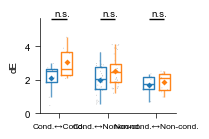

In [34]:
fig = adjust_fig_multi_vs(output_figs, figsize=(2.2, 1.5))
fig_name = f'{dataset_name}_{params.metric}_multi_vs_{window_tag}'
if hue_color_adjusted:
    fig_name += '_adjusted_color'
save_figure_for_paper(fig, fig_name, fig_subdir)
fig


In [35]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
# Replace aa_vs_aa with AvsA, aa_vs_ba with AvsB, ba_vs_aa with BvsA, ba_vs_ba with BvsB
sentence = sentence.replace('aa_vs_aa', 'AvsA').replace('aa_vs_ba', 'AvsB').replace('ba_vs_aa', 'BvsA').replace('ba_vs_ba', 'BvsB')
print(sentence)
# Save sentence into a text file
with open(pjoin(fig_subdir, f'{dataset_name}_{params.metric}_multi_vs_{window_tag}.txt'), 'w') as f:
    f.write(sentence)

For learned_vs_learned, Comparing naive (mean = 2.12 ± 0.91, n = 8) vs trained (mean = 3.05 ± 0.88, n = 9): Mann–Whitney U test, U = 22.00, P = 0.200. For learned_vs_novel, Comparing naive (mean = 2.01 ± 0.84, n = 32) vs trained (mean = 2.54 ± 0.89, n = 36): Mann–Whitney U test, U = 417.00, P = 0.051. For novel_vs_novel, Comparing naive (mean = 1.71 ± 0.56, n = 8) vs trained (mean = 1.89 ± 0.59, n = 9): Mann–Whitney U test, U = 26.00, P = 0.370.
